In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import math
import copy
from plotBoundarySV import *
import pylab as pl
%matplotlib inline

In [2]:
plt.style.use('fivethirtyeight')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['figure.autolayout'] = 'true'

In [3]:
train = np.loadtxt('data/data3_train.csv')
X = train[:,0:2]
Y = train[:,2:3]

In [7]:
def run_pegasos(gamma, threshold=1e5):
    alpha = np.zeros(len(X))
    prev = copy(alpha)
    L = 0.02
    step_size = 1e-1
    max_epochs = 1000
    t = 0
    K = get_kernel(X, gamma)
    for epoch in range(max_epochs):
        for i in range(len(X)):
            t += 1
            step_size = 1/(t*L)
            alpha[i] *= 1-step_size*L
            if Y[i]*(alpha.dot(K[i])) < 1:
                alpha[i] += step_size*Y[i]
        #print np.linalg.norm(alpha)
        if np.linalg.norm(alpha-prev) < threshold:
            print 'Ran for', epoch, 'epochs'
            break
        prev = copy(alpha)
    idx = []
    for j,a in enumerate(alpha):
        if a != 0:
            idx.append(j)
    def predict_gaussianSVM(x):
        return sum([alpha[i]*gauss_kernel(x,X[i],gamma) for i in idx])
    return alpha, idx, predict_gaussianSVM

Ran for 59 epochs
sparsity = 0.075


/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


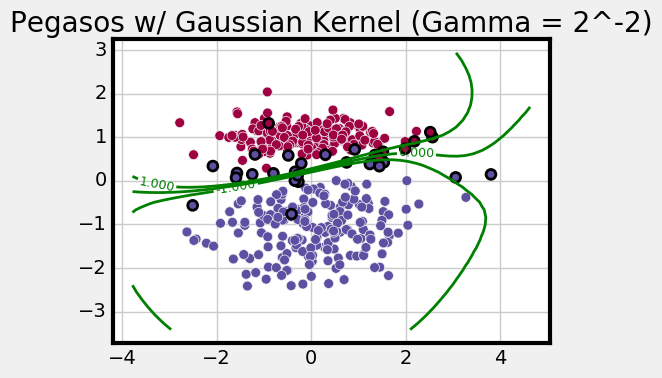

Ran for 57 epochs
sparsity = 0.075


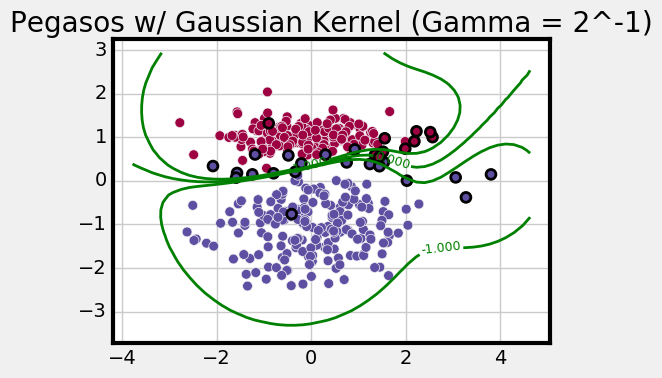

Ran for 51 epochs
sparsity = 0.07


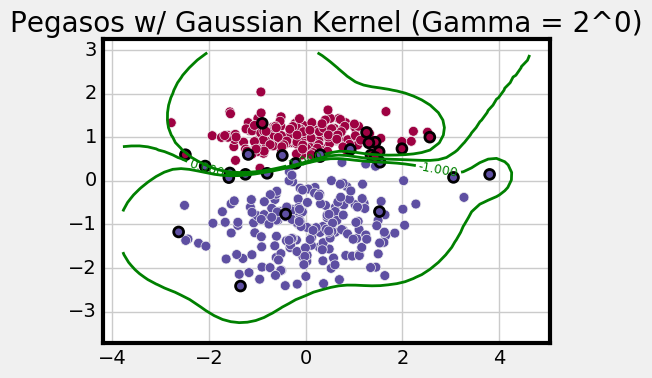

Ran for 65 epochs
sparsity = 0.0925


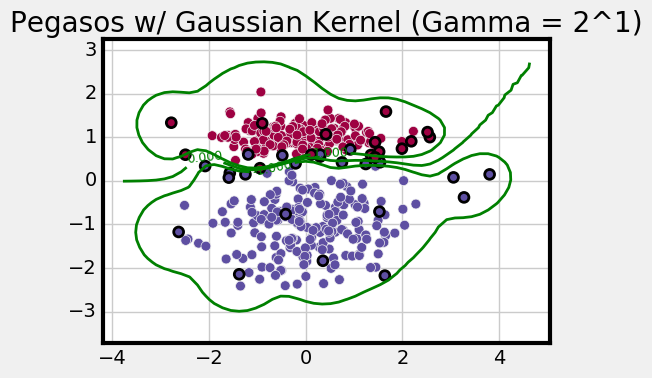

Ran for 75 epochs
sparsity = 0.145


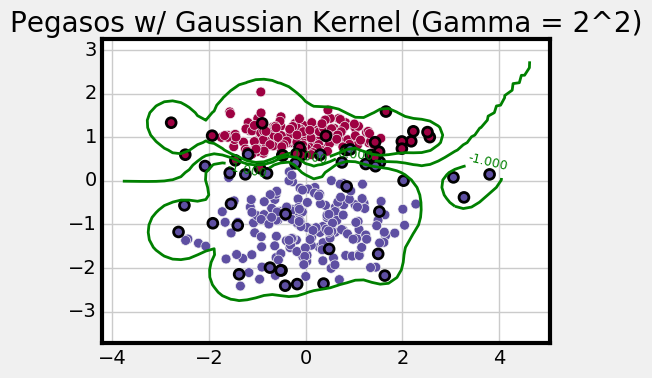

In [8]:
threshold = 1e-2
poss = 2.0**np.array(range(-2,3))
for i, gamma in enumerate(poss):
    alpha, idx, predict_gaussianSVM = run_pegasos(gamma, threshold)
    print 'sparsity =', len(idx)*1.0/len(alpha)
    plotDecisionBoundary(X, Y, idx, predict_gaussianSVM, [-1,0,1], title = 'Pegasos w/ Gaussian Kernel (Gamma = 2^'+str(i-2)+')')
    pl.show()

In [4]:
def get_kernel(X, gamma):
    def gauss_kernel(x1, x2):
        v = x1-x2
        return np.exp(-gamma*v.dot(v))
    n = len(X)
    K = np.zeros((n,n))
    for i in range(n):
        for j in range(i+1,n):
            K[i][j] = gauss_kernel(X[i], X[j])
            K[j][i] = K[i][j]
    return K

In [5]:
def gauss_kernel(x1, x2, gamma):
    v = x1-x2
    return np.exp(-gamma*v.dot(v))

In [6]:
np.array(range(5))[[True,False,False,True,False]]

/home/shankha/.local/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
  if __name__ == '__main__':


array([1, 0, 0, 1, 0])

In [37]:
1.-Y[idx]

array([[ 0.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 0.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 0.],
       [ 0.],
       [ 2.],
       [ 2.],
       [ 0.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 0.],
       [ 2.],
       [ 2.],
       [ 0.],
       [ 0.],
       [ 2.],
       [ 2.],
       [ 2.]])